# SMS Spam Detection using Python

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

## Loading the Datasets

In [2]:
df = pd.read_csv("D:\spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing

In [3]:
df  = df[['v1','v2']]
df = df.rename(columns={'v1':'label','v2':'message'})

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

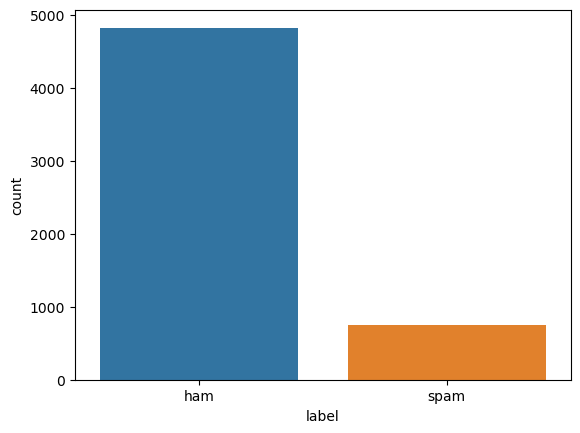

In [7]:
sns.countplot(x=df['label'])
plt.show()

In [8]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [9]:
df['clean_text'] = df['message'].apply(clean_text)
df.head()

,label,message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [10]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['message']])/len(df['message']))
print(avg_words_len)


15


In [11]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['message']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print(total_words_length)


15585


## Input Split

In [12]:
X = df['clean_text']
y = df['label']

## Model Training

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))
    
    return pipeline_model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 96.8413496051687
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.99      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.69777458722182
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [16]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 98.27709978463747
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=3))])

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 97.34386216798278
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       1.00      0.80      0.89       187

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

#### Final thoughts are SVC model has the best accuracy with 98.28
    

In [18]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 98.27709978463747
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=3))])